In [47]:
import pandas as pd 
import seaborn as sns
import numpy as np
df = pd.read_json('gme.json')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5600 non-null   datetime64[ns]
 1   Open       5600 non-null   float64       
 2   High       5600 non-null   float64       
 3   Low        5600 non-null   float64       
 4   Close      5600 non-null   float64       
 5   Adj Close  5600 non-null   float64       
 6   Volume     5600 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 306.4 KB


In [23]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
df['High'].max()

120.75

In [24]:
df[df['High']==120.75]

,Date,Open,High,Low,Close,Adj Close,Volume
4772,2021-01-28,66.25,120.75,28.0625,48.400002,48.400002,235263200


In [37]:
count = 0
total = 0
for i in range(len(df)):
    if df.loc[i]['Date'].month == 6:
        avg = (df.loc[i]['High']+ df.loc[i]['Low'])/2
        total += avg
        count += 1
total/count

10.193287575692963

<AxesSubplot:xlabel='Volume', ylabel='Low'>

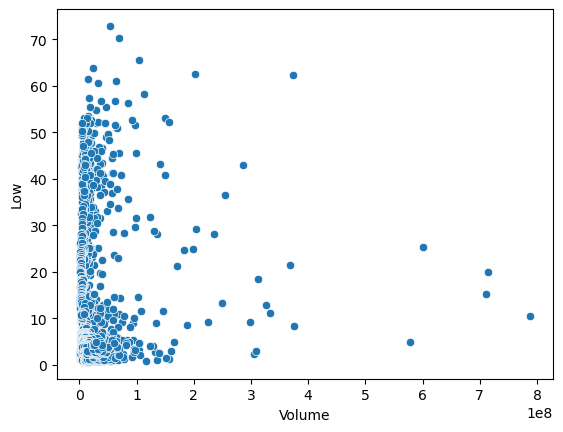

In [38]:
sns.scatterplot(data = df, x='Volume', y = 'Low')

In [39]:
df["Low"].corr(df['Volume'])

0.10259646883179026

In this data the direction is negative. This is a very very weak negative relationship between these varibles. I calculated the Pearsono correlation coefficient and it is 0.1 proving that this was a weak relationship. 

<AxesSubplot:xlabel='Date', ylabel='Log High'>

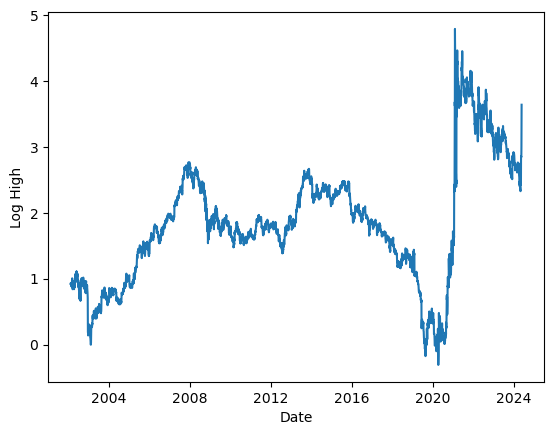

In [50]:
sns.lineplot(data = df, x='Date', y = 'Log High')

In [48]:
log_high = np.log(df['High'])

In [49]:
df['Log High'] = log_high

In [51]:
df['numeric_time'] = pd.to_datetime(df['Date']).astype('int64') // 10**9

correlation = df['numeric_time'].corr(df['Log High'])

In [52]:
correlation

0.45097470030936637

The form of this graph is exponetial.